#Necessary Imports

In [ ]:
from google.colab import files
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder


#Importing Data






In [ ]:
import pandas as pd
train_data = pd.read_csv('/content/sample_data/train.csv')
test_data = pd.read_csv('/content/sample_data/test.csv')
print(train_data.head())

   Order        PID  MS SubClass MS Zoning  Lot Frontage  Lot Area Street  \
0    534  531363010           20        RL          80.0      9605   Pave   
1    803  906203120           20        RL          90.0     14684   Pave   
2    956  916176030           20        RL           NaN     14375   Pave   
3    460  528180130          120        RL          48.0      6472   Pave   
4    487  528290030           80        RL          61.0      9734   Pave   

  Alley Lot Shape Land Contour  ... Pool Area Pool QC Fence Misc Feature  \
0   NaN       Reg          Lvl  ...         0     NaN   NaN          NaN   
1   NaN       IR1          Lvl  ...         0     NaN   NaN          NaN   
2   NaN       IR1          Lvl  ...         0     NaN   NaN          NaN   
3   NaN       Reg          Lvl  ...         0     NaN   NaN          NaN   
4   NaN       IR1          Lvl  ...         0     NaN   NaN          NaN   

  Misc Val Mo Sold Yr Sold Sale Type  Sale Condition  SalePrice  
0        0    

In [ ]:
train_data

,Order,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,...,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,Sale Condition,SalePrice
0,534,531363010,20,RL,80.0,9605,Pave,NaN,Reg,Lvl,...,0,NaN,NaN,NaN,0,4,2009,WD,Normal,159000
1,803,906203120,20,RL,90.0,14684,Pave,NaN,IR1,Lvl,...,0,NaN,NaN,NaN,0,6,2009,WD,Normal,271900
2,956,916176030,20,RL,NaN,14375,Pave,NaN,IR1,Lvl,...,0,NaN,NaN,NaN,0,1,2009,COD,Abnorml,137500
3,460,528180130,120,RL,48.0,6472,Pave,NaN,Reg,Lvl,...,0,NaN,NaN,NaN,0,4,2009,WD,Normal,248500
4,487,528290030,80,RL,61.0,9734,Pave,NaN,IR1,Lvl,...,0,NaN,NaN,NaN,0,5,2009,WD,Normal,167000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2192,2764,906420020,60,RL,80.0,10041,Pave,NaN,IR1,Lvl,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,220000
2193,906,909129090,50,RH,70.0,6300,Pave,Pave,Reg,Lvl,...,0,NaN,NaN,NaN,0,7,2009,WD,Abnorml,160000
2194,1097,528292060,60,RL,41.0,12460,Pave,NaN,IR1,Lvl,...,0,NaN,NaN,NaN,0,5,2008,WD,Normal,225000
2195,236,905426060,30,RL,85.0,10625,Pave,NaN,Reg,Lvl,...,0,NaN,NaN,Shed,400,5,2010,COD,Abnorml,83000


In [ ]:
train_data.dtypes

,0
Order,int64
PID,int64
MS SubClass,int64
MS Zoning,object
Lot Frontage,float64
...,...
Mo Sold,int64
Yr Sold,int64
Sale Type,object
Sale Condition,object


In [ ]:
test_data

,Order,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,...,Screen Porch,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,Sale Condition
0,2127,907135180,20,RL,60.0,8070,Pave,NaN,Reg,Lvl,...,0,0,NaN,NaN,NaN,0,8,2007,WD,Normal
1,193,903206120,75,RL,NaN,7793,Pave,NaN,IR1,Bnk,...,0,0,NaN,NaN,NaN,0,5,2010,WD,Normal
2,2407,528181040,120,RL,40.0,6792,Pave,NaN,IR1,Lvl,...,0,0,NaN,NaN,NaN,0,3,2006,New,Partial
3,46,528175010,120,RL,44.0,6371,Pave,NaN,IR1,Lvl,...,0,0,NaN,NaN,NaN,0,6,2010,New,Partial
4,2478,531379030,60,RL,70.0,8304,Pave,NaN,IR1,Lvl,...,0,0,NaN,GdPrv,NaN,0,7,2006,WD,Normal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
728,453,528174060,120,RL,34.0,5381,Pave,NaN,IR1,Lvl,...,0,0,NaN,NaN,NaN,0,8,2009,WD,Normal
729,1352,903400180,50,RL,64.0,13053,Pave,Pave,Reg,Bnk,...,220,0,NaN,NaN,NaN,0,6,2008,WD,Normal
730,197,903227150,50,RM,53.0,6360,Pave,NaN,Reg,Lvl,...,148,0,NaN,NaN,NaN,0,3,2010,WD,Normal
731,2850,909250070,70,RL,43.0,7000,Pave,NaN,Reg,Lvl,...,0,0,NaN,MnPrv,NaN,0,5,2006,WD,Normal


#Data Preprocessing

In [ ]:
train_data

,Order,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,...,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,Sale Condition,SalePrice
0,534,531363010,20,RL,80.0,9605,Pave,NaN,Reg,Lvl,...,0,NaN,NaN,NaN,0,4,2009,WD,Normal,159000
1,803,906203120,20,RL,90.0,14684,Pave,NaN,IR1,Lvl,...,0,NaN,NaN,NaN,0,6,2009,WD,Normal,271900
2,956,916176030,20,RL,NaN,14375,Pave,NaN,IR1,Lvl,...,0,NaN,NaN,NaN,0,1,2009,COD,Abnorml,137500
3,460,528180130,120,RL,48.0,6472,Pave,NaN,Reg,Lvl,...,0,NaN,NaN,NaN,0,4,2009,WD,Normal,248500
4,487,528290030,80,RL,61.0,9734,Pave,NaN,IR1,Lvl,...,0,NaN,NaN,NaN,0,5,2009,WD,Normal,167000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2192,2764,906420020,60,RL,80.0,10041,Pave,NaN,IR1,Lvl,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,220000
2193,906,909129090,50,RH,70.0,6300,Pave,Pave,Reg,Lvl,...,0,NaN,NaN,NaN,0,7,2009,WD,Abnorml,160000
2194,1097,528292060,60,RL,41.0,12460,Pave,NaN,IR1,Lvl,...,0,NaN,NaN,NaN,0,5,2008,WD,Normal,225000
2195,236,905426060,30,RL,85.0,10625,Pave,NaN,Reg,Lvl,...,0,NaN,NaN,Shed,400,5,2010,COD,Abnorml,83000


In [ ]:
train_data = train_data.loc[:, ~train_data.columns.duplicated()]
train_data

,Order,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,...,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,Sale Condition,SalePrice
0,534,531363010,20,RL,80.0,9605,Pave,NaN,Reg,Lvl,...,0,NaN,NaN,NaN,0,4,2009,WD,Normal,159000
1,803,906203120,20,RL,90.0,14684,Pave,NaN,IR1,Lvl,...,0,NaN,NaN,NaN,0,6,2009,WD,Normal,271900
2,956,916176030,20,RL,NaN,14375,Pave,NaN,IR1,Lvl,...,0,NaN,NaN,NaN,0,1,2009,COD,Abnorml,137500
3,460,528180130,120,RL,48.0,6472,Pave,NaN,Reg,Lvl,...,0,NaN,NaN,NaN,0,4,2009,WD,Normal,248500
4,487,528290030,80,RL,61.0,9734,Pave,NaN,IR1,Lvl,...,0,NaN,NaN,NaN,0,5,2009,WD,Normal,167000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2192,2764,906420020,60,RL,80.0,10041,Pave,NaN,IR1,Lvl,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,220000
2193,906,909129090,50,RH,70.0,6300,Pave,Pave,Reg,Lvl,...,0,NaN,NaN,NaN,0,7,2009,WD,Abnorml,160000
2194,1097,528292060,60,RL,41.0,12460,Pave,NaN,IR1,Lvl,...,0,NaN,NaN,NaN,0,5,2008,WD,Normal,225000
2195,236,905426060,30,RL,85.0,10625,Pave,NaN,Reg,Lvl,...,0,NaN,NaN,Shed,400,5,2010,COD,Abnorml,83000


In [ ]:
numerical_data = train_data.select_dtypes("number")
numerical_data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2197 entries, 0 to 2196
Data columns (total 39 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Order            2197 non-null   int64  
 1   PID              2197 non-null   int64  
 2   MS SubClass      2197 non-null   int64  
 3   Lot Frontage     1835 non-null   float64
 4   Lot Area         2197 non-null   int64  
 5   Overall Qual     2197 non-null   int64  
 6   Overall Cond     2197 non-null   int64  
 7   Year Built       2197 non-null   int64  
 8   Year Remod/Add   2197 non-null   int64  
 9   Mas Vnr Area     2175 non-null   float64
 10  BsmtFin SF 1     2196 non-null   float64
 11  BsmtFin SF 2     2196 non-null   float64
 12  Bsmt Unf SF      2196 non-null   float64
 13  Total Bsmt SF    2196 non-null   float64
 14  1st Flr SF       2197 non-null   int64  
 15  2nd Flr SF       2197 non-null   int64  
 16  Low Qual Fin SF  2197 non-null   int64  
 17  Gr Liv Area   

In [ ]:
from sklearn.preprocessing import LabelEncoder

# find teh categorical columns
categorical_columns = train_data.select_dtypes(include=['object']).columns

# initialize label encoder
label_encoder = LabelEncoder()

# Apply LabelEncoder to categorical columns
for col in categorical_columns:
    train_data[col] = label_encoder.fit_transform(train_data[col])
    test_data[col] = label_encoder.transform(test_data[col])


print(train_data.head())

   Order        PID  MS SubClass  MS Zoning  Lot Frontage  Lot Area  Street  \
0    534  531363010           20          5          80.0      9605       1   
1    803  906203120           20          5          90.0     14684       1   
2    956  916176030           20          5           NaN     14375       1   
3    460  528180130          120          5          48.0      6472       1   
4    487  528290030           80          5          61.0      9734       1   

   Alley  Lot Shape  Land Contour  ...  Pool Area  Pool QC  Fence  \
0      2          3             3  ...          0        4      4   
1      2          0             3  ...          0        4      4   
2      2          0             3  ...          0        4      4   
3      2          3             3  ...          0        4      4   
4      2          0             3  ...          0        4      4   

   Misc Feature  Misc Val  Mo Sold  Yr Sold  Sale Type  Sale Condition  \
0             5         0        4  

In [ ]:
train_data.isnull().sum()


,0
Order,0
PID,0
MS SubClass,0
MS Zoning,0
Lot Frontage,362
...,...
Mo Sold,0
Yr Sold,0
Sale Type,0
Sale Condition,0


In [ ]:
test_data.isnull().sum()

,0
Order,0
PID,0
MS SubClass,0
MS Zoning,0
Lot Frontage,128
...,...
Misc Val,0
Mo Sold,0
Yr Sold,0
Sale Type,0


In [ ]:
# Fill NAs with mean
train_data.fillna(train_data.mean(), inplace=True)
test_data.fillna(test_data.mean(), inplace=True)


print(train_data.isnull().sum())

Order             0
PID               0
MS SubClass       0
MS Zoning         0
Lot Frontage      0
                 ..
Mo Sold           0
Yr Sold           0
Sale Type         0
Sale Condition    0
SalePrice         0
Length: 82, dtype: int64


#Data Visualization

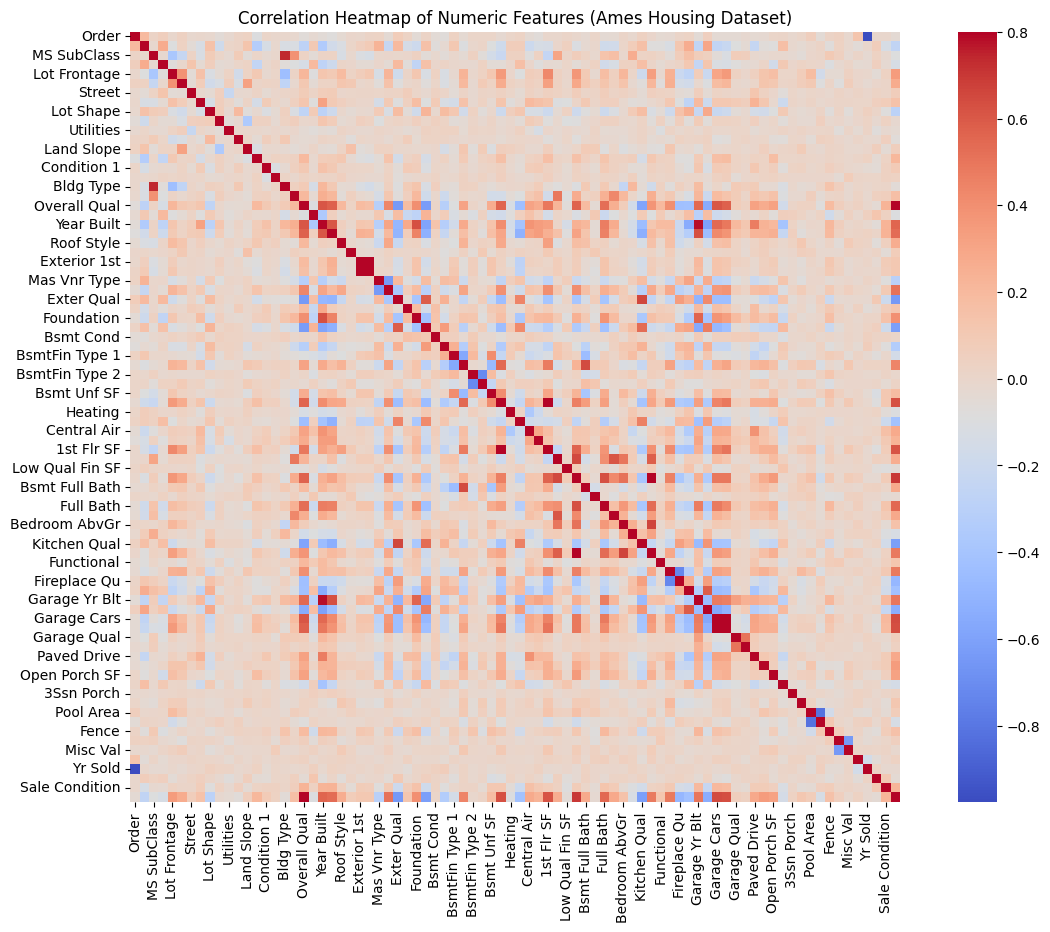

In [ ]:
# Correlation matrix
correlation_matrix = train_data.corr()

# heatmap for the correlation matrix

plt.figure(figsize=(15, 10))
sns.heatmap(correlation_matrix, vmax=.8, cmap='coolwarm', square=True)
plt.title('Correlation Heatmap of Numeric Features (Ames Housing Dataset)')
plt.show()

Text(0, 0.5, 'Sale Price')

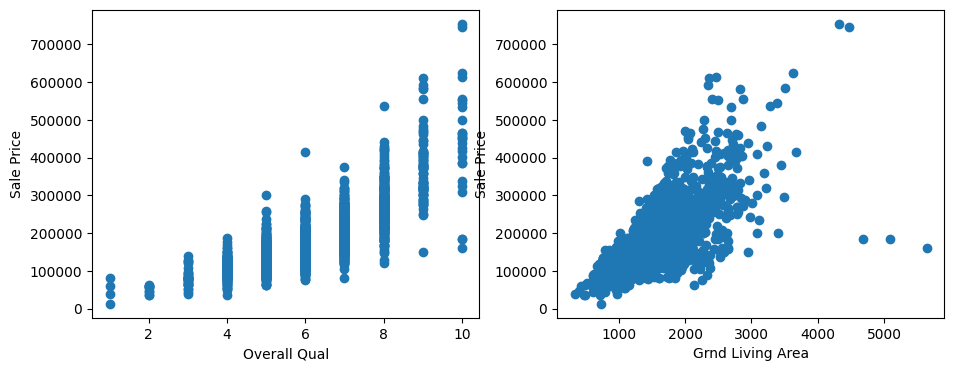

In [ ]:
plt.figure(figsize=(11,4))
plt.subplot(1,2,1)
plt.scatter(train_data['Overall Qual'], train_data['SalePrice'])
plt.xlabel('Overall Qual'); plt.ylabel('Sale Price')

plt.subplot(1,2,2)
plt.scatter(train_data['Gr Liv Area'], train_data['SalePrice'])
plt.xlabel('Grnd Living Area'); plt.ylabel('Sale Price')

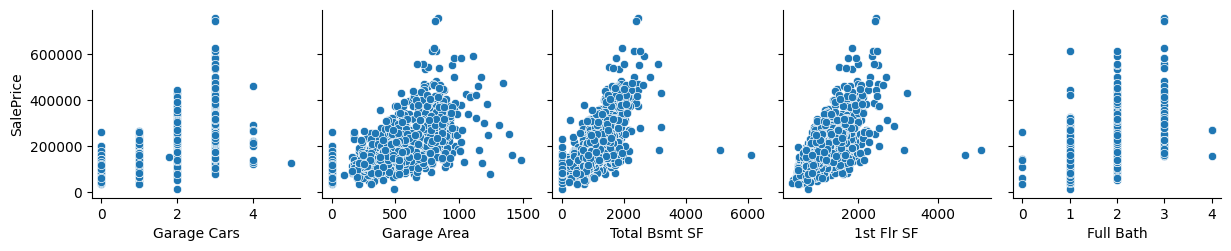

In [ ]:
var = ['Garage Cars', 'Garage Area', 'Total Bsmt SF', '1st Flr SF', 'Full Bath']
sns.pairplot(x_vars = var, y_vars = 'SalePrice', data = train_data)
plt.show()

#Feature Engineering

In [ ]:
train_data['TotBath'] = train_data['Bsmt Full Bath'] + train_data['Full Bath'] + 0.5 * (train_data['Bsmt Half Bath'] + train_data['Half Bath'])
train_data['Overall_Score'] = train_data['Overall Qual'] * train_data['Overall Cond']
train_data['Total_area'] = train_data['1st Flr SF'] + train_data['2nd Flr SF'] + train_data['Total Bsmt SF']
train_data['Garage_Score'] = train_data['Garage Qual'] * train_data['Garage Cond']
train_data['Kitchen_Score'] = train_data['Kitchen AbvGr'] * train_data['Kitchen Qual']
train_data['Bsmt_Score'] = train_data['Bsmt Qual'] * train_data['Bsmt Cond']

In [ ]:
train_data

,Order,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,...,Yr Sold,Sale Type,Sale Condition,SalePrice,TotBath,Overall_Score,Total_area,Garage_Score,Kitchen_Score,Bsmt_Score
0,534,531363010,20,5,80.000000,9605,1,2,3,3,...,2009,9,4,159000,1.5,42,2436.0,16,2,8
1,803,906203120,20,5,90.000000,14684,1,2,0,3,...,2009,9,4,271900,2.0,49,4354.0,16,2,8
2,956,916176030,20,5,69.549319,14375,1,2,0,3,...,2009,0,0,137500,1.5,36,2163.0,16,2,16
3,460,528180130,120,5,48.000000,6472,1,2,3,3,...,2009,9,4,248500,2.0,45,2907.0,16,0,0
4,487,528290030,80,5,61.000000,9734,1,2,0,3,...,2009,9,4,167000,2.5,35,1758.0,16,2,8
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2192,2764,906420020,60,5,80.000000,10041,1,2,0,3,...,2006,9,0,220000,3.5,40,2823.0,16,2,8
2193,906,909129090,50,4,70.000000,6300,1,1,3,3,...,2009,9,0,160000,1.5,20,2100.0,16,4,4
2194,1097,528292060,60,5,41.000000,12460,1,2,0,3,...,2008,9,4,225000,2.5,35,3359.0,16,4,8
2195,236,905426060,30,5,85.000000,10625,1,2,3,3,...,2010,0,0,83000,1.0,25,1293.0,4,4,16


#Basic Linear Regression

In [ ]:
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score



# Define the x features and y target
X = train_data.drop('SalePrice', axis=1)
y = train_data['SalePrice']

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# creat linear regression model
model = LinearRegression()

# Training
model.fit(X_train, y_train)

# Prediction
y_pred = model.predict(X_test)

# Evaluation
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error: {mse}")
print(f"R² Score: {r2}")

Mean Squared Error: 1084080510.489916
R² Score: 0.7952807748622587


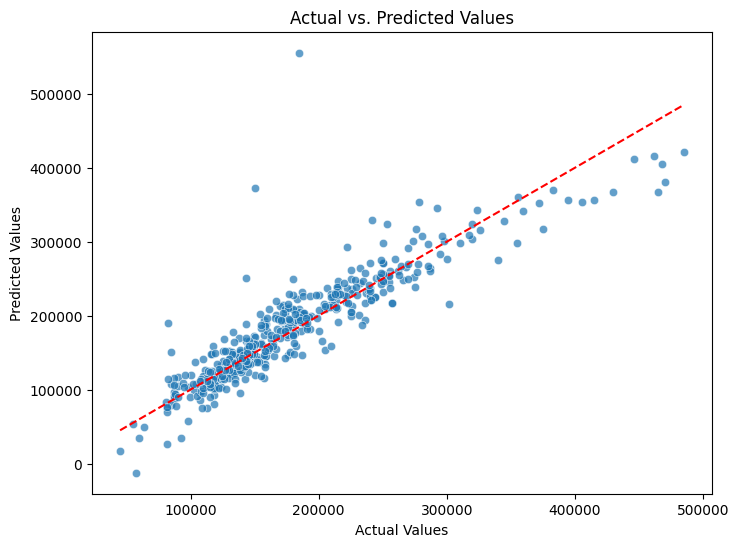

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Visualize predicted values vs actual values
plt.figure(figsize=(8, 6))
sns.scatterplot(x=y_test, y=linear_regression_predictions, alpha=0.7)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', linestyle='--')  # Ideal fit line
plt.title('Actual vs. Predicted Values')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.show()


#Ridge Regressor

In [ ]:
from sklearn.linear_model import Ridge
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

In [ ]:
ridge_model = Ridge(alpha=1.0)

# Training
ridge_model.fit(X_train, y_train)

# Prediction
y_pred_ridge = ridge_model.predict(X_test)

# Evaluation
mse_ridge = mean_squared_error(y_test, y_pred_ridge)
r2_ridge = r2_score(y_test, y_pred_ridge)

print(f"Ridge Regression - Mean Squared Error: {mse_ridge}")
print(f"Ridge Regression - R² Score: {r2_ridge}")

Ridge Regression - Mean Squared Error: 1081068102.4633546
Ridge Regression - R² Score: 0.7958496420552661


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_ridge.py:216: LinAlgWarning: Ill-conditioned matrix (rcond=1.09721e-20): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T


In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import Ridge

# Hyperparameter tuning using GridSearchCV
param_grid = {'alpha': [0.1, 1.0, 10.0, 100.0, 1000.0]}
ridge = Ridge()
grid_search = GridSearchCV(ridge, param_grid, cv=5, scoring='neg_mean_squared_error')
grid_search.fit(X_train, y_train)

# Optimal hyperparameters
best_alpha = grid_search.best_params_['alpha']
print(f"Best alpha: {best_alpha}")


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_ridge.py:216: LinAlgWarning: Ill-conditioned matrix (rcond=1.3743e-21): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_ridge.py:216: LinAlgWarning: Ill-conditioned matrix (rcond=1.37339e-21): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_ridge.py:216: LinAlgWarning: Ill-conditioned matrix (rcond=1.36988e-21): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_ridge.py:216: LinAlgWarning: Ill-conditioned matrix (rcond=1.37153e-21): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_ridge.py:216: LinAlgWarning

Best alpha: 100.0


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_ridge.py:216: LinAlgWarning: Ill-conditioned matrix (rcond=1.36965e-19): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_ridge.py:216: LinAlgWarning: Ill-conditioned matrix (rcond=1.43297e-18): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_ridge.py:216: LinAlgWarning: Ill-conditioned matrix (rcond=1.43538e-18): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_ridge.py:216: LinAlgWarning: Ill-conditioned matrix (rcond=1.41883e-18): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_ridge.py:216: LinAlgWarnin

In [ ]:
# Ridge regression tuned
ridge_model = Ridge(alpha=best_alpha)
ridge_model.fit(X_train, y_train)

# Prediction
y_pred_ridge = ridge_model.predict(X_test)

# Evaluation
mse_ridge = mean_squared_error(y_test, y_pred_ridge)
r2_ridge = r2_score(y_test, y_pred_ridge)

print(f"Ridge Regression - Mean Squared Error: {mse_ridge}")
print(f"Ridge Regression - R² Score: {r2_ridge}")



Ridge Regression - Mean Squared Error: 1041568859.42597
Ridge Regression - R² Score: 0.8033087323625776


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_ridge.py:216: LinAlgWarning: Ill-conditioned matrix (rcond=1.15274e-18): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T


#XGboost Regressor

In [ ]:
import xgboost as xgb
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

In [ ]:
xg_reg = xgb.XGBRegressor(objective='reg:squarederror', n_estimators=100)


In [ ]:
# Training
xg_reg.fit(X_train, y_train)

# Prediction
y_pred_xgb = xg_reg.predict(X_test)

# Evaluaton
mse_xgb = mean_squared_error(y_test, y_pred_xgb)
r2_xgb = r2_score(y_test, y_pred_xgb)

print(f"XGBoost - Mean Squared Error: {mse_xgb}")
print(f"XGBoost - R² Score: {r2_xgb}")

XGBoost - Mean Squared Error: 638023398.238944
XGBoost - R² Score: 0.8795148134231567


In [ ]:
from sklearn.model_selection import GridSearchCV

# tuning params
param_grid = {
    'learning_rate': [0.01, 0.1, 0.3],
    'max_depth': [3, 5, 7],
    'n_estimators': [100, 200, 300]
}

grid_search = GridSearchCV(estimator=xg_reg, param_grid=param_grid, cv=5, scoring='neg_mean_squared_error')


grid_search.fit(X_train, y_train)

print(f"Best parameters: {grid_search.best_params_}")
print(f"Best score: {grid_search.best_score_}")

Best parameters: {'learning_rate': 0.1, 'max_depth': 3, 'n_estimators': 300}
Best score: -526742300.0008275


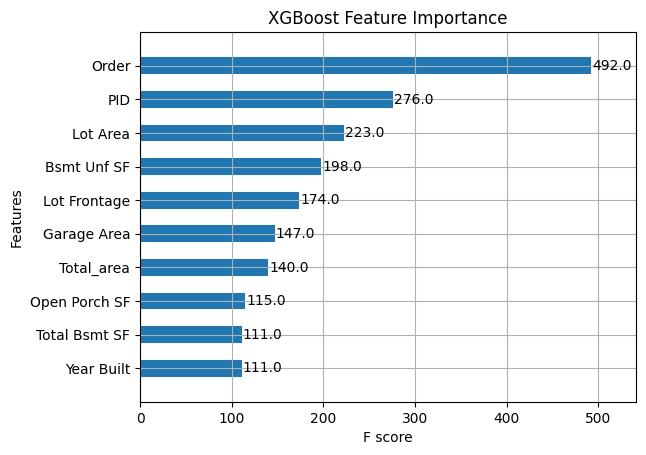

In [ ]:
xgb.plot_importance(xg_reg, importance_type='weight', max_num_features=10, height=0.5)
plt.title('XGBoost Feature Importance')
plt.show()

In [ ]:
xg_reg = xgb.XGBRegressor(
    learning_rate=0.1,
    max_depth=3,
    n_estimators=300,
    objective='reg:squarederror'
)

# Traininng
xg_reg.fit(X_train, y_train)

# Prediction
y_pred_xgb = xg_reg.predict(X_test)

# Evaluation
mse_xgb = mean_squared_error(y_test, y_pred_xgb)
r2_xgb = r2_score(y_test, y_pred_xgb)

print(f"XGBoost - Mean Squared Error: {mse_xgb}")
print(f"XGBoost - R² Score: {r2_xgb}")

XGBoost - Mean Squared Error: 523120792.88297397
XGBoost - R² Score: 0.9012131690979004


#RF regressor


In [ ]:
from sklearn.ensemble import RandomForestRegressor
rf_regressor = RandomForestRegressor(n_estimators=100, random_state=42)
rf_regressor.fit(X_train, y_train)



RandomForestRegressor(random_state=42)

In [ ]:
y_pred_rf = rf_regressor.predict(X_test)
mse_rf = mean_squared_error(y_test, y_pred_rf)
r2_rf = r2_score(y_test, y_pred_rf)

print(f"Random Forest - Mean Squared Error: {mse_rf}")
print(f"Random Forest - R² Score: {r2_rf}")

Random Forest - Mean Squared Error: 759616802.222512
Random Forest - R² Score: 0.8565529389673056


In [ ]:
# tuning params
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [10, 20, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'bootstrap': [True, False]
}
rf_regressor = RandomForestRegressor(random_state=42)
grid_search = GridSearchCV(estimator=rf_regressor, param_grid=param_grid, cv=5, n_jobs=-1, verbose=2, scoring='neg_mean_squared_error')
grid_search.fit(X_train, y_train)
print(f"Best parameters: {grid_search.best_params_}")

Fitting 5 folds for each of 162 candidates, totalling 810 fits


ERROR:root:Internal Python error in the inspect module.
Below is the traceback from this internal error.



Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/joblib/parallel.py", line 1650, in _get_outputs
    yield from self._retrieve()
  File "/usr/local/lib/python3.10/dist-packages/joblib/parallel.py", line 1762, in _retrieve
    time.sleep(0.01)
KeyboardInterrupt

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/IPython/core/interactiveshell.py", line 3553, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "<ipython-input-116-bb41e9710e04>", line 17, in <cell line: 17>
    grid_search.fit(X_train, y_train)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/base.py", line 1473, in wrapper
    return fit_method(estimator, *args, **kwargs)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_search.py", line 1019, in fit
    self._run_search(evaluate_candidates)
  File "/usr/local/lib/python3.10/dist-packages/

TypeError: object of type 'NoneType' has no len()

In [ ]:
best_rf = grid_search.best_estimator_
y_pred_rf = best_rf.predict(X_test)
mse_rf = mean_squared_error(y_test, y_pred_rf)
r2_rf = r2_score(y_test, y_pred_rf)
print(f"Tuned Random Forest - Mean Squared Error: {mse_rf}")
print(f"Tuned Random Forest - R² Score: {r2_rf}")

#KNN


In [ ]:
from sklearn.neighbors import KNeighborsRegressor
knn_regressor = KNeighborsRegressor(n_neighbors=5)
knn_regressor.fit(X_train, y_train)

KNeighborsRegressor()

In [ ]:
y_pred_knn = knn_regressor.predict(X_test)
mse_knn = mean_squared_error(y_test, y_pred_knn)
r2_knn = r2_score(y_test, y_pred_knn)

In [ ]:
print(f"KNN Regressor - Mean Squared Error: {mse_knn}")
print(f"KNN Regressor - R² Score: {r2_knn}")

KNN Regressor - Mean Squared Error: 1923680904.8838181
KNN Regressor - R² Score: 0.636729504451554


In [ ]:
param_grid = {
    'n_neighbors': [1, 3, 5, 7, 9, 11],
    'weights': ['uniform', 'distance'],
    'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute']
}
knn= KNeighborsRegressor()
grid_search = GridSearchCV(knn, param_grid, cv=5, scoring='neg_mean_squared_error')
grid_search.fit(X_train, y_train)
print(f"Best parameters: {grid_search.best_params_}")


Best parameters: {'algorithm': 'auto', 'n_neighbors': 3, 'weights': 'distance'}


/usr/local/lib/python3.10/dist-packages/numpy/ma/core.py:2820: RuntimeWarning: invalid value encountered in cast
  _data = np.array(data, dtype=dtype, copy=copy,


In [ ]:
mse_knn = mean_squared_error(y_test, y_pred_knn)
r2_knn = r2_score(y_test, y_pred_knn)

print(f"Tuned KNN - Mean Squared Error: {mse_knn}")
print(f"Tuned KNN - R² Score: {r2_knn}")

Tuned KNN - Mean Squared Error: 1923680904.8838181
Tuned KNN - R² Score: 0.636729504451554


#Decision Tree Regressor

In [ ]:
from sklearn.tree import DecisionTreeRegressor
dt_regressor = DecisionTreeRegressor(random_state=42)
dt_regressor.fit(X_train, y_train)
dt_regressor.fit(X_train, y_train)
y_pred_dt = dt_regressor.predict(X_test)
mse_dt = mean_squared_error(y_test, y_pred_dt)
r2_dt = r2_score(y_test, y_pred_dt)
print(f"Decision Tree - Mean Squared Error: {mse_dt}")
print(f"Decision Tree - R² Score: {r2_dt}")

Decision Tree - Mean Squared Error: 1636933992.4363637
Decision Tree - R² Score: 0.6908791779848913


#SVR

In [ ]:
from sklearn.svm import SVR
svr_model = SVR(kernel='rbf')
# Train the model
svr_model.fit(X_train, y_train)

# Predict on the test set
y_pred_svr = svr_model.predict(X_test)

# Evaluate the model
mse_svr = mean_squared_error(y_test, y_pred_svr)
r2_svr = r2_score(y_test, y_pred_svr)

print(f"SVR - Mean Squared Error: {mse_svr}")
print(f"SVR - R² Score: {r2_svr}")

SVR - Mean Squared Error: 5631231314.23452
SVR - R² Score: -0.0634093132995206


In [ ]:
# Define parameter grid
param_grid = {
    'C': [0.1, 1, 10],
    'epsilon': [0.01, 0.1, 0.2],
    'kernel': ['linear', 'rbf', 'poly']
}

# Initialize SVR
svr = SVR()

# Set up GridSearchCV
grid_search = GridSearchCV(svr, param_grid, cv=5, scoring='neg_mean_squared_error', n_jobs=-1)

# Fit grid search
grid_search.fit(X_train, y_train)

# Best parameters and model
print(f"Best parameters: {grid_search.best_params_}")